In [2]:
# Import necessary resources
import sys
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 14]

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the general system of first-order ODEs for Van der Pol-Duffing oscillator
def van_der_pol_duffing(t, y, mu, alpha, beta, F, omega):
    y1, y2 = y[0], y[1]  # y1 = x (displacement), y2 = dx/dt (velocity)
    dy1_dt = y2
    dy2_dt = mu * (1 - y1**2) * y2 - alpha * y1 - beta * y1**3 + F * np.cos(omega * t)
    return np.array([dy1_dt, dy2_dt])

# Runge-Kutta 4th order method implementation
def runge_kutta_4(f, y0, t0, tf, h, mu, alpha, beta, F, omega):
    t_values = np.arange(t0, tf, h)
    y_values = np.zeros((len(t_values), len(y0)))
    
    # Set the initial conditions
    y_values[0] = y0
    t = t0
    
    for i in range(1, len(t_values)):
        k1 = h * f(t, y_values[i-1], mu, alpha, beta, F, omega)
        k2 = h * f(t + 0.5*h, y_values[i-1] + 0.5*k1, mu, alpha, beta, F, omega)
        k3 = h * f(t + 0.5*h, y_values[i-1] + 0.5*k2, mu, alpha, beta, F, omega)
        k4 = h * f(t + h, y_values[i-1] + k3, mu, alpha, beta, F, omega)
        
        y_values[i] = y_values[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6.0
        t += h
        
    return t_values, y_values

# Plot function to visualize results
def plot_results(t_values, y_values, title):
    plt.figure(figsize=(10, 6))
    plt.plot(t_values, y_values[:, 0], label='Displacement (x)', color='blue')
    plt.plot(t_values, y_values[:, 1], label='Velocity (dx/dt)', color='red')
    plt.title(title)
    plt.xlabel("Time (t)")
    plt.ylabel("Solution")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Phase-plane plot (displacement vs. velocity)
    plt.figure(figsize=(8, 6))
    plt.plot(y_values[:, 0], y_values[:, 1], color='green')
    plt.title(f"Phase-plane Plot: {title}")
    plt.xlabel("Displacement (x)")
    plt.ylabel("Velocity (dx/dt)")
    plt.grid(True)
    plt.show()


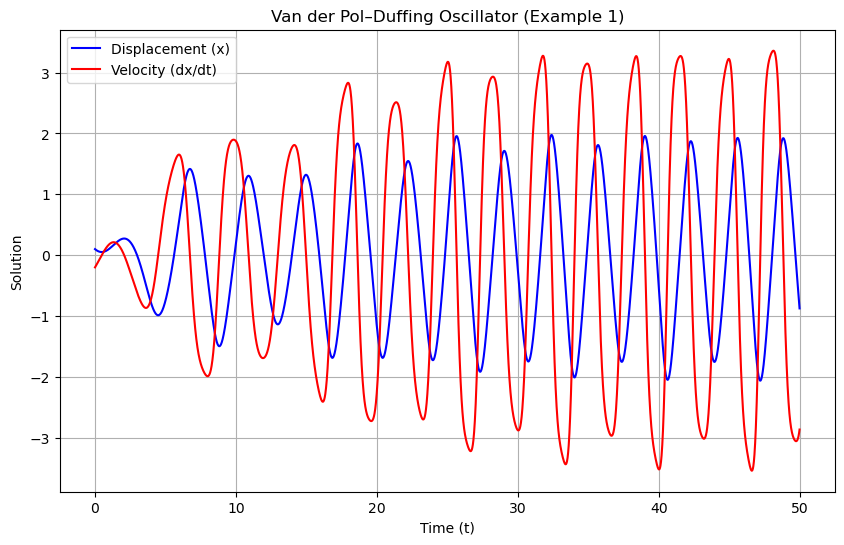

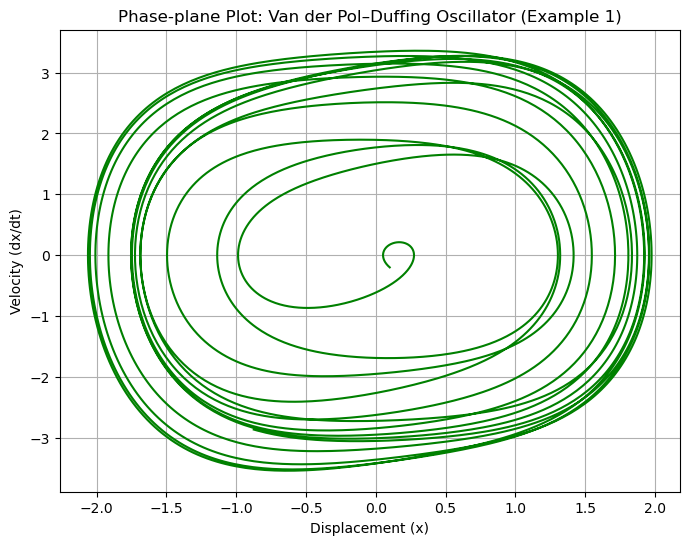

In [6]:
# Example 1 parameters
mu, alpha, beta, F, omega = 0.2, 1.0, 1.0, 0.53, 1.0
y0 = [0.1, -0.2]  # Initial displacement and velocity
t0, tf, h = 0.0, 50.0, 0.01  # Time range

# Solve the ODEs using Runge-Kutta 4th order method
t_values, y_values = runge_kutta_4(van_der_pol_duffing, y0, t0, tf, h, mu, alpha, beta, F, omega)

# Plot results
plot_results(t_values, y_values, "Van der Pol–Duffing Oscillator (Example 1)")


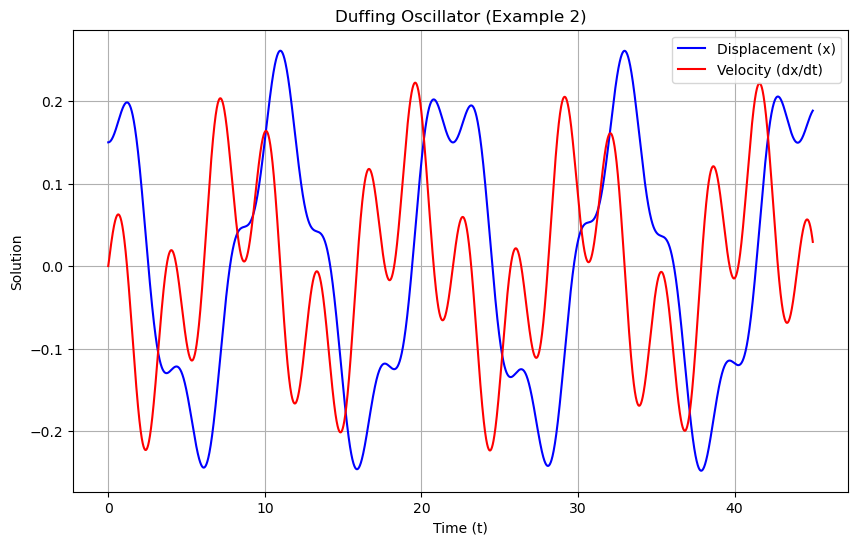

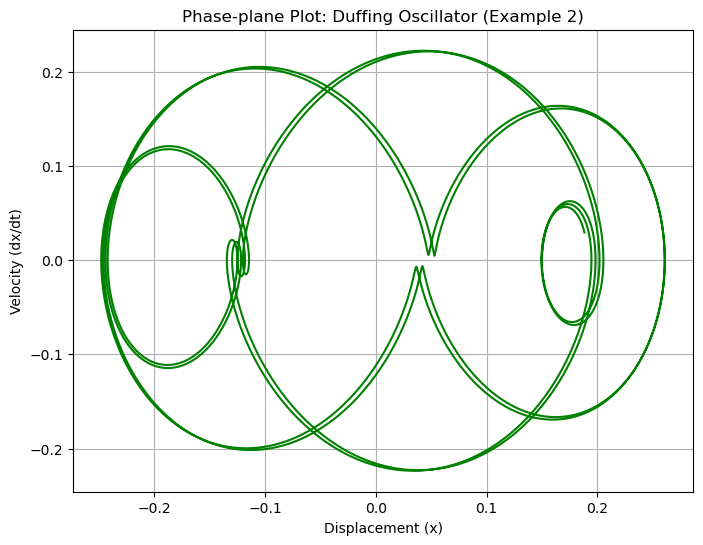

In [7]:
# Example 2 parameters
mu, alpha, beta, F, omega = 0.0, 0.32, 0.22, 0.2, 2.0
y0 = [0.15, 0.0]  # Initial displacement and velocity
t0, tf, h = 0.0, 45.0, 0.01  # Time range

# Solve the ODEs using Runge-Kutta 4th order method
t_values, y_values = runge_kutta_4(van_der_pol_duffing, y0, t0, tf, h, mu, alpha, beta, F, omega)

# Plot results
plot_results(t_values, y_values, "Duffing Oscillator (Example 2)")


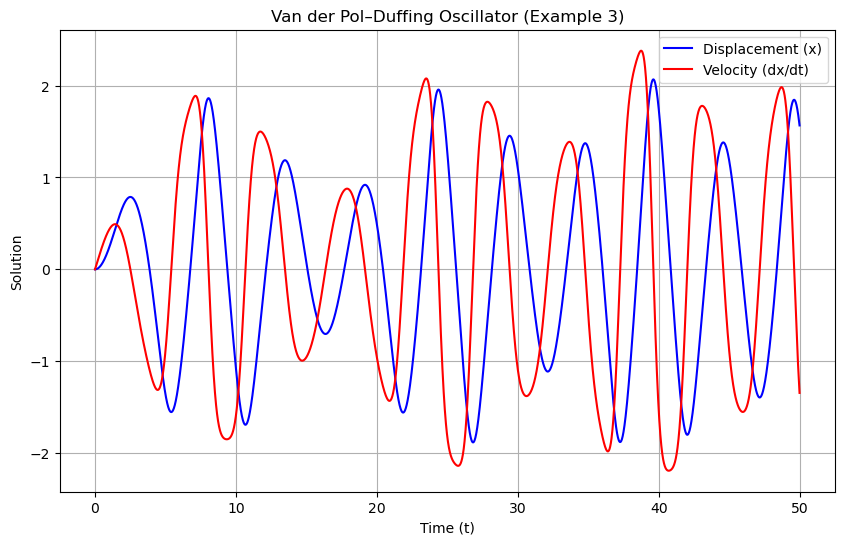

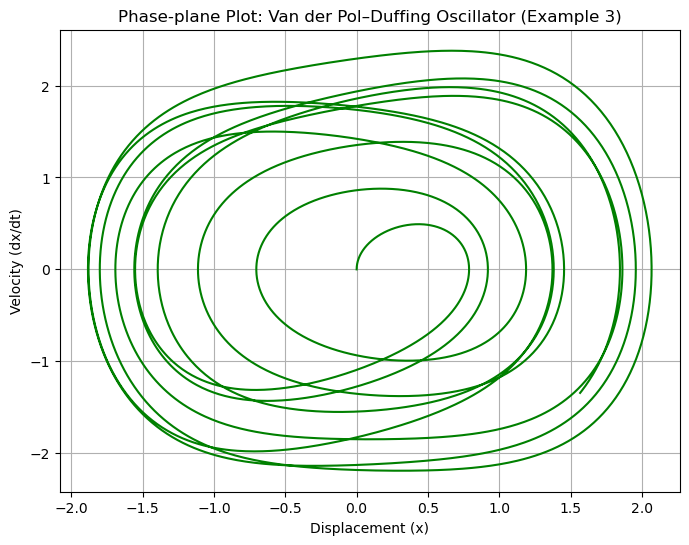

In [8]:
# Example 3 parameters
mu, alpha, beta, F, omega = 0.1, 0.5, 0.5, 0.5, 0.79
y0 = [0.0, 0.0]  # Initial displacement and velocity
t0, tf, h = 0.0, 50.0, 0.01  # Time range

# Solve the ODEs using Runge-Kutta 4th order method
t_values, y_values = runge_kutta_4(van_der_pol_duffing, y0, t0, tf, h, mu, alpha, beta, F, omega)

# Plot results
plot_results(t_values, y_values, "Van der Pol–Duffing Oscillator (Example 3)")


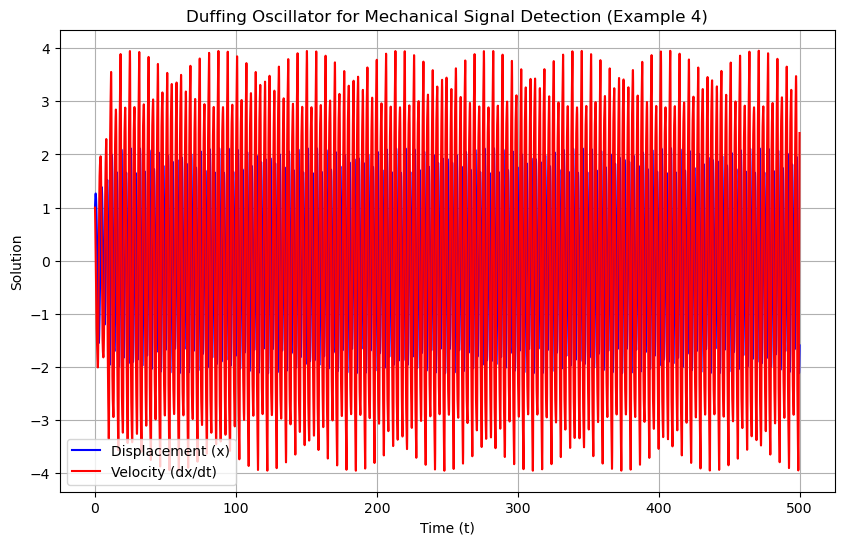

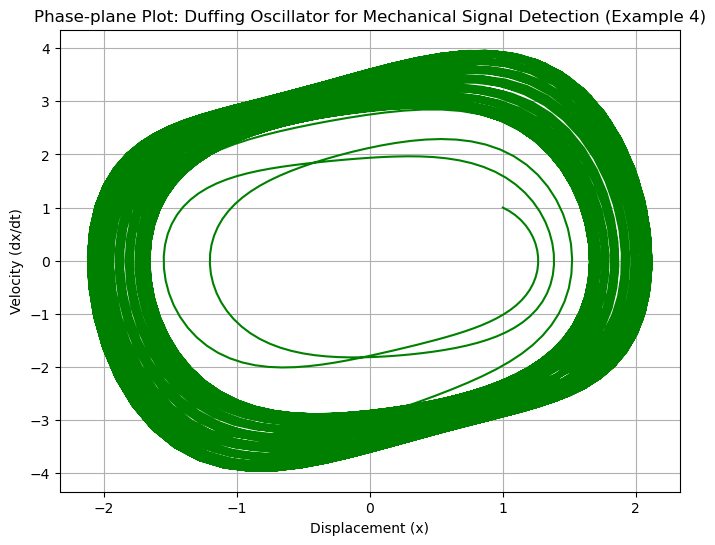

In [9]:
# Example 4 parameters
mu, alpha, beta, F, omega = 0.5, 1.0, 1.0, 0.8275, 1.0
y0 = [1.0, 1.0]  # Initial displacement and velocity
t0, tf, h = 0.0, 500.0, 0.05  # Time range

# Solve the ODEs using Runge-Kutta 4th order method
t_values, y_values = runge_kutta_4(van_der_pol_duffing, y0, t0, tf, h, mu, alpha, beta, F, omega)

# Plot results
plot_results(t_values, y_values, "Duffing Oscillator for Mechanical Signal Detection (Example 4)")


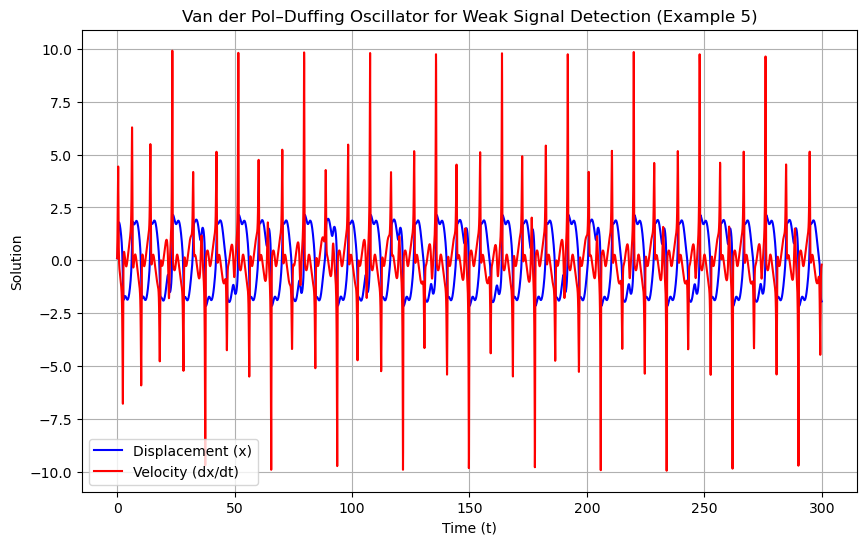

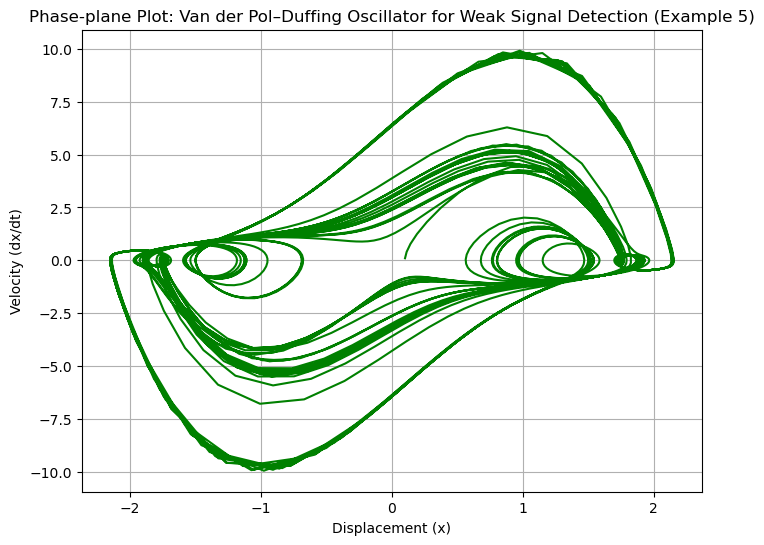

In [11]:
# Example 5 parameters
mu, alpha, beta, F, omega = 5.0, 1.0, 0.01, 4.9, 2.463
y0 = [0.1, 0.1]  # Initial displacement and velocity
t0, tf, h = 0.0, 300.0, 0.05  # Time range

# Solve the ODEs using Runge-Kutta 4th order method
t_values, y_values = runge_kutta_4(van_der_pol_duffing, y0, t0, tf, h, mu, alpha, beta, F, omega)

# Plot results
plot_results(t_values, y_values, "Van der Pol–Duffing Oscillator for Weak Signal Detection (Example 5)")
